# GP4QC

## Install Dependencies

In [1]:
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load and Preprocess Data

In [2]:
import pandas as pd 

# To avoid consistency errors, copy the results from each server to 
# separate directories. The files from these directories are merged here.

icarus_experiments = pd.read_csv("results/icarus/experiments.csv", delimiter=";")
romulus_experiments = pd.read_csv("results/romulus/experiments.csv", delimiter=";")
all_experiments = pd.concat([icarus_experiments, romulus_experiments], ignore_index=True)

icarus_events = pd.read_csv("results/icarus/events.csv", delimiter=";")
romulus_events = pd.read_csv("results/romulus/events.csv", delimiter=";")
all_events = pd.concat([icarus_events, romulus_events], ignore_index=True)

icarus_fitness_values = pd.read_csv("results/icarus/fitness_values.csv", delimiter=";")
romulus_fitness_values = pd.read_csv("results/romulus/fitness_values.csv", delimiter=";")
all_fitness_values = pd.concat([icarus_fitness_values, romulus_fitness_values], ignore_index=True)

/var/folders/8q/rp8w2yvx1wq18fndqwtvqx340000gn/T/ipykernel_48282/1677399368.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Remove potential trailing white spaces from column names
all_experiments.columns = all_experiments.columns.str.strip()
all_events.columns = all_events.columns.str.strip()
all_fitness_values.columns = all_fitness_values.columns.str.strip()

In [4]:
from datetime import datetime

all_experiments["created_at"] = all_experiments["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
all_events["created_at"] = all_events["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
all_fitness_values["created_at"] = all_fitness_values["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))

In [5]:
def extract_fitness(fitness: str) -> str:
    fitness = fitness.split()[0]
    fitness = fitness.split(".")[-1]
    return fitness

all_experiments["fitness"] = all_experiments["fitness"].apply(lambda x: extract_fitness(x))

In [6]:
def create_configuration(fitness: str, description: str) -> str:
    if description.strip() == "":
        return f"{fitness}; no abstraction learning"
    else:
        return f"{fitness}; {description.strip()}"

all_experiments["configuration"] = all_experiments[["fitness", "description"]].apply(lambda row: create_configuration(row[0], row[1]), axis=1)

/var/folders/8q/rp8w2yvx1wq18fndqwtvqx340000gn/T/ipykernel_48282/2113213457.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_experiments["configuration"] = all_experiments[["fitness", "description"]].apply(lambda row: create_configuration(row[0], row[1]), axis=1)


In [7]:
all_experiments = all_experiments.sort_values(by=["created_at"], ascending=True)
all_events = all_events.sort_values(by=["created_at"], ascending=True)
all_fitness_values = all_fitness_values.sort_values(by=["created_at"], ascending=True)

## Select Test Case

In [8]:
EVALUATION_CASE = "bernstein" # bernstein

experiments = all_experiments.loc[all_experiments["experiment_id"].str.startswith(EVALUATION_CASE)]
fitness_values = all_fitness_values.loc[all_fitness_values["experiment_id"].str.startswith(EVALUATION_CASE)]
events = all_events

## Visualize Fitness Value Changes By Experiment

Experiment Id: bernstein_vazirani_3qubits_004e538c-4fe5-4e3f-9193-d4a329cde095
	Configuration: BaselineFitness; no abstraction learning
	2024-05-03 15:26:29.143867 - 2024-05-03 17:36:08.598277


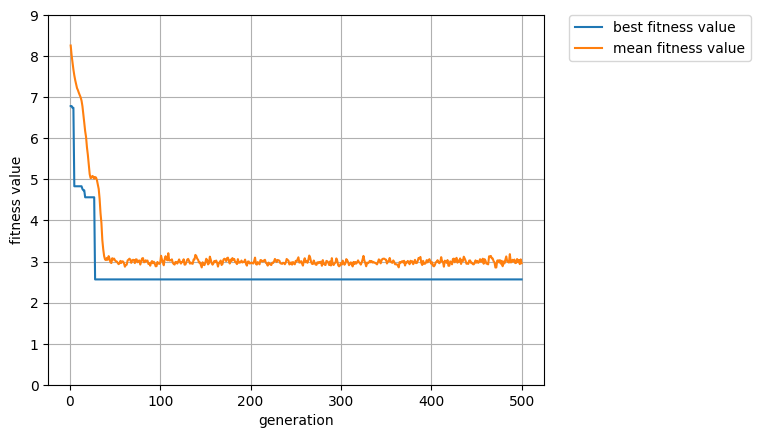

Experiment Id: bernstein_vazirani_3qubits_5a04b29f-de79-47c3-b414-cc9be05a7350
	Configuration: IndirectQAFitness; no abstraction learning
	2024-05-03 17:36:29.237609 - 2024-05-03 19:39:11.106254


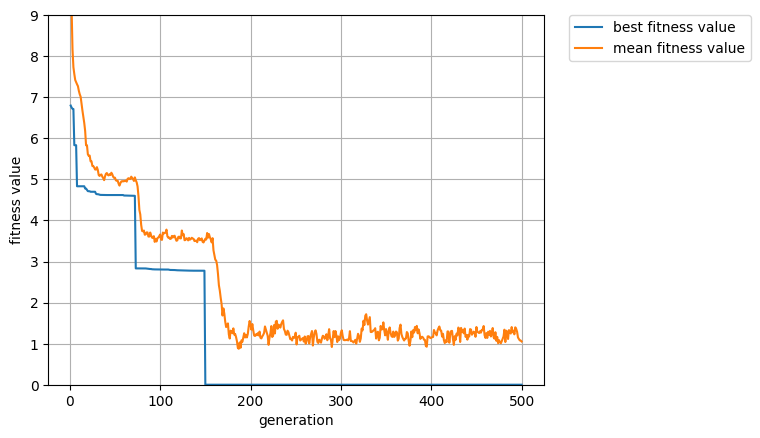

Experiment Id: bernstein_vazirani_3qubits_66faebce-f86f-4d4c-a0ae-30acd3569010
	Configuration: DirectQAFitness; no abstraction learning
	2024-05-03 19:39:30.713050 - 2024-05-03 20:13:11.795411


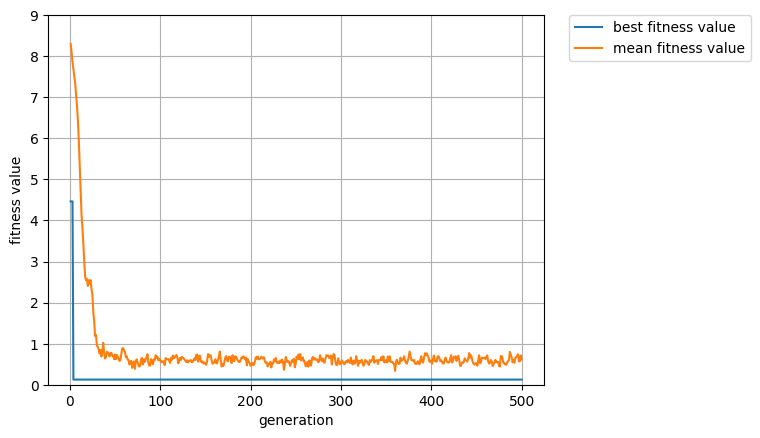

Experiment Id: bernstein_vazirani_3qubits_d44dff94-1887-4485-9fa9-52dd311d0546
	Configuration: BaselineFitness; abstraction learning enabled
	2024-05-03 20:13:31.573167 - 2024-05-03 21:05:38.159796


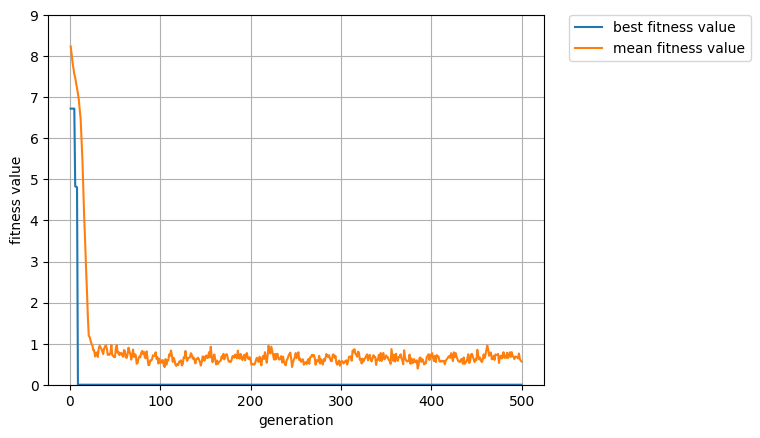

Experiment Id: bernstein_vazirani_3qubits_170674af-f969-4570-812d-bdfab1e635f7
	Configuration: IndirectQAFitness; abstraction learning enabled
	2024-05-03 21:05:57.823161 - 2024-05-03 22:07:25.591639


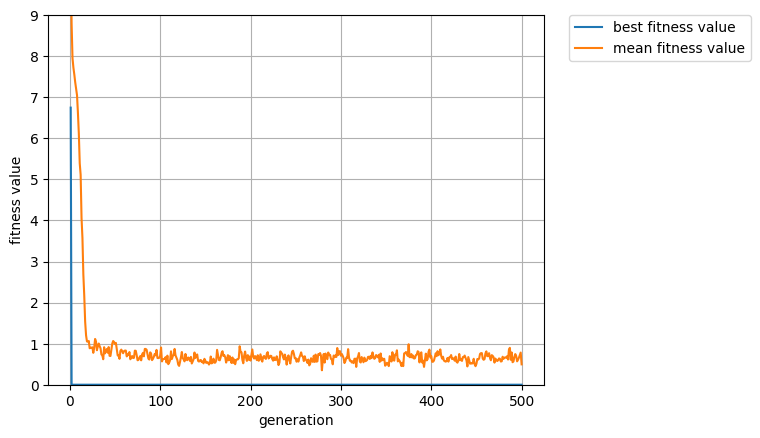

Experiment Id: bernstein_vazirani_3qubits_411a2619-9fa5-423c-bc53-cae9868d76bf
	Configuration: DirectQAFitness; abstraction learning enabled
	2024-05-03 22:07:45.784566 - 2024-05-04 00:52:58.269800


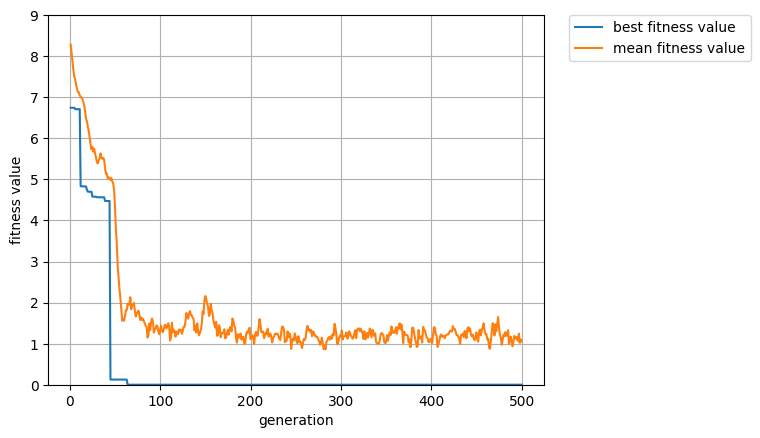

Experiment Id: bernstein_vazirani_3qubits_250d2f0f-5225-483b-9bae-982aa90f8a84
	Configuration: BaselineFitness; no abstraction learning
	2024-05-06 08:19:23.771621 - 2024-05-06 08:29:49.763530


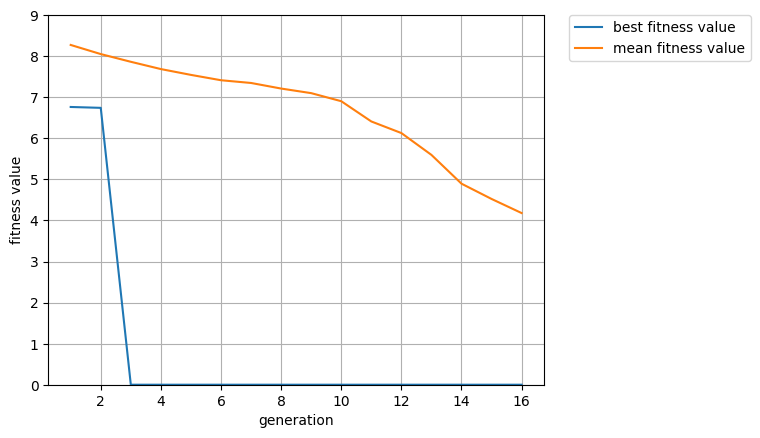

Experiment Id: bernstein_vazirani_3qubits_9766162f-0e9e-4963-9e67-fd64c6de355c
	Configuration: BaselineFitness; no abstraction learning
	2024-05-06 08:38:09.515753 - 2024-05-06 10:40:34.788589


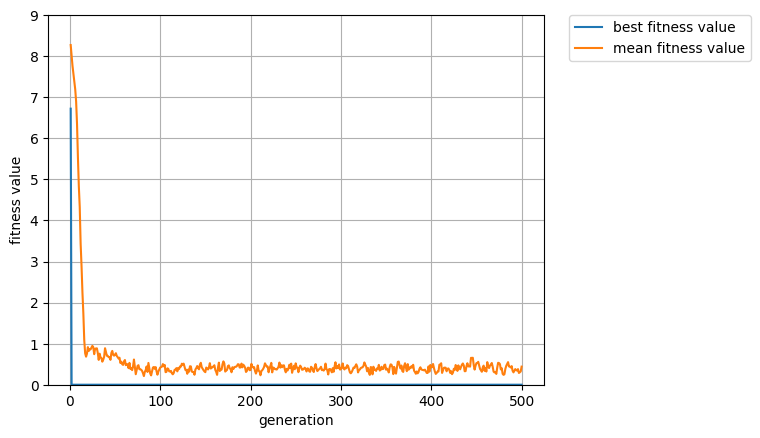

Experiment Id: bernstein_vazirani_3qubits_e7ac30f6-6470-4935-a532-192c96e9a7e3
	Configuration: IndirectQAFitness; no abstraction learning
	2024-05-06 10:41:16.377707 - 2024-05-06 12:54:04.945753


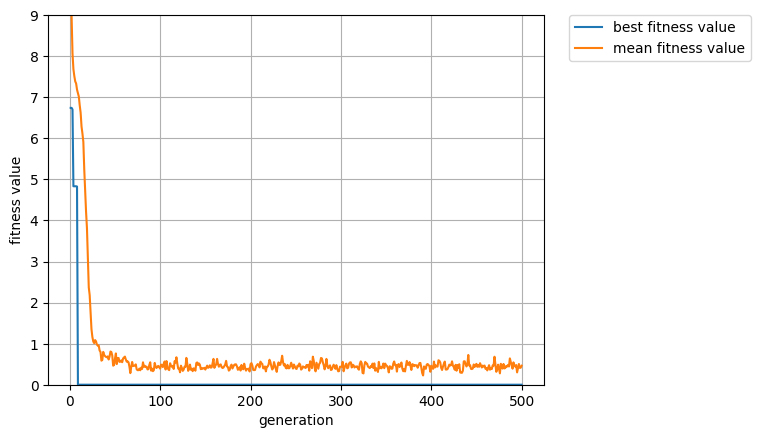

Experiment Id: bernstein_vazirani_3qubits_f1ce8b18-b56f-4c85-817a-3e4e131f4662
	Configuration: DirectQAFitness; no abstraction learning
	2024-05-06 12:54:44.150562 - 2024-05-06 14:03:22.422048


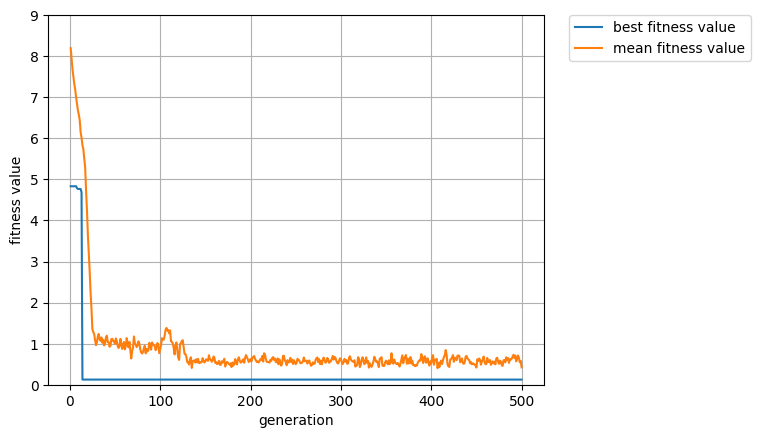

Experiment Id: bernstein_vazirani_3qubits_9c9d9d36-6417-4d9e-867d-8a5e0807e0c3
	Configuration: BaselineFitness; abstraction learning enabled
	2024-05-06 14:04:04.613400 - 2024-05-06 15:20:04.147009


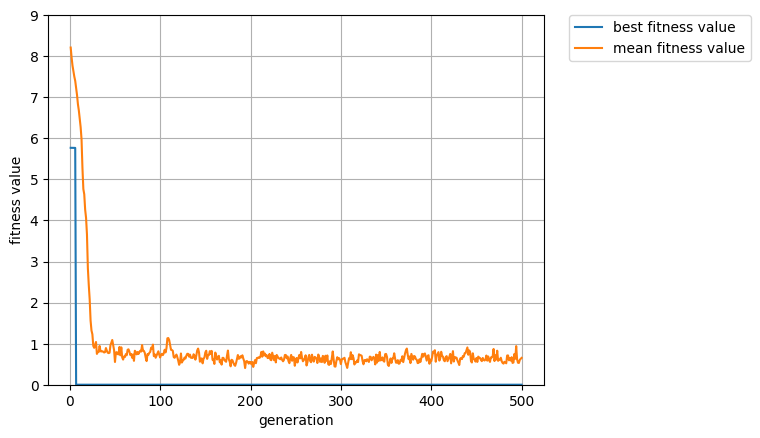

Experiment Id: bernstein_vazirani_3qubits_3815334e-b9d1-4581-8c1b-ce55c7b12aff
	Configuration: IndirectQAFitness; abstraction learning enabled
	2024-05-06 15:20:47.188657 - 2024-05-06 18:29:50.440237


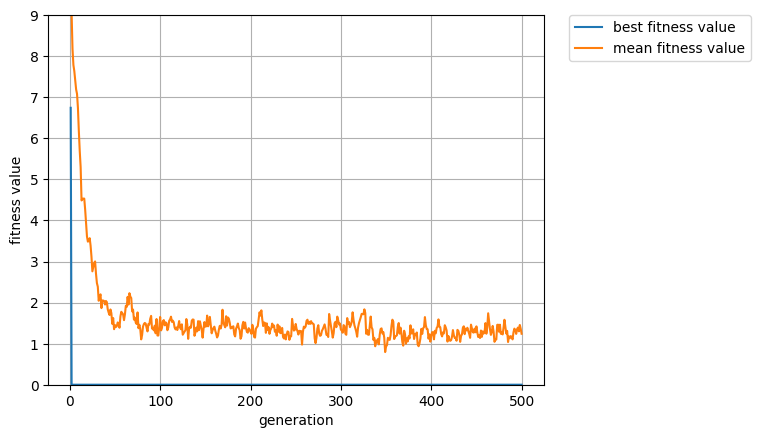

Experiment Id: bernstein_vazirani_3qubits_901c6d8c-6ab9-466d-b451-2c2ebaa06738
	Configuration: DirectQAFitness; abstraction learning enabled
	2024-05-06 18:30:33.502602 - 2024-05-06 20:16:47.358775


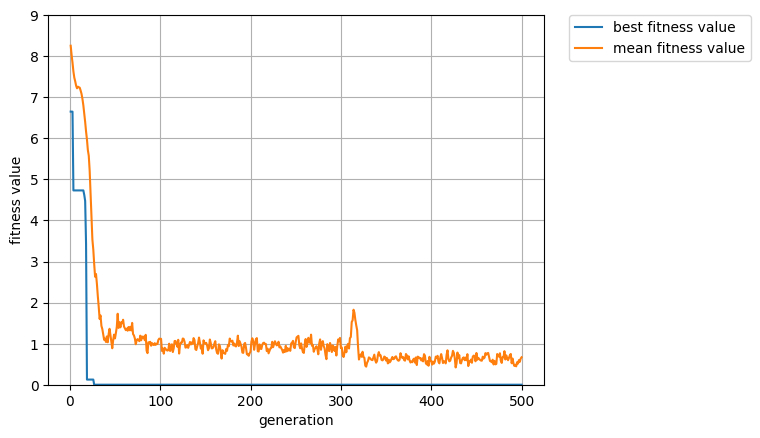

Experiment Id: bernstein_vazirani_3qubits_75a0d3a1-c35a-48ab-9bc2-d6ba74226608
	Configuration: BaselineFitness; no abstraction learning
	2024-05-08 05:45:40.176480 - 2024-05-08 06:27:42.866522


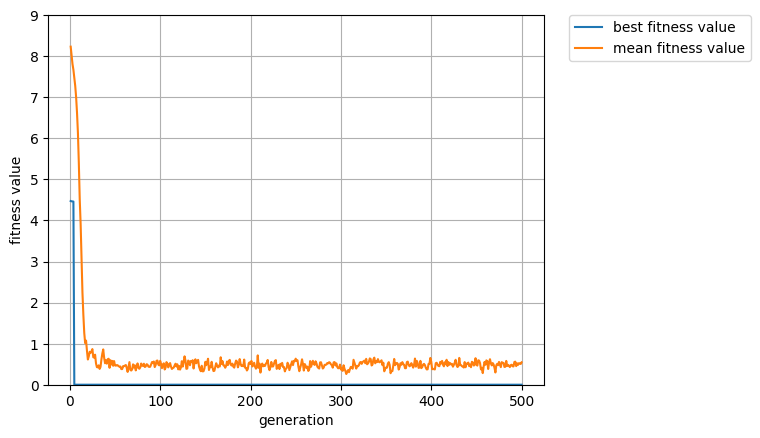

Experiment Id: bernstein_vazirani_3qubits_7bcf5e1d-caae-4686-a7e5-e7a84aeca279
	Configuration: IndirectQAFitness; no abstraction learning
	2024-05-08 06:28:02.968127 - 2024-05-08 07:02:05.934192


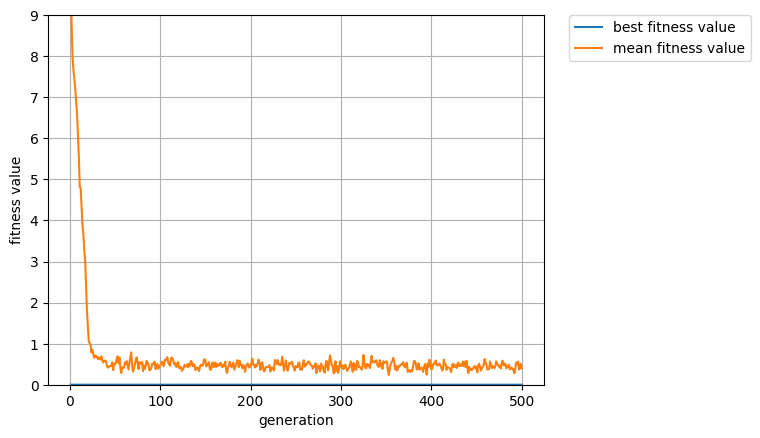

Experiment Id: bernstein_vazirani_3qubits_ab9f2446-05fd-4ea4-81ab-9d705939f27a
	Configuration: DirectQAFitness; no abstraction learning
	2024-05-08 07:02:26.928188 - 2024-05-08 07:46:59.970240


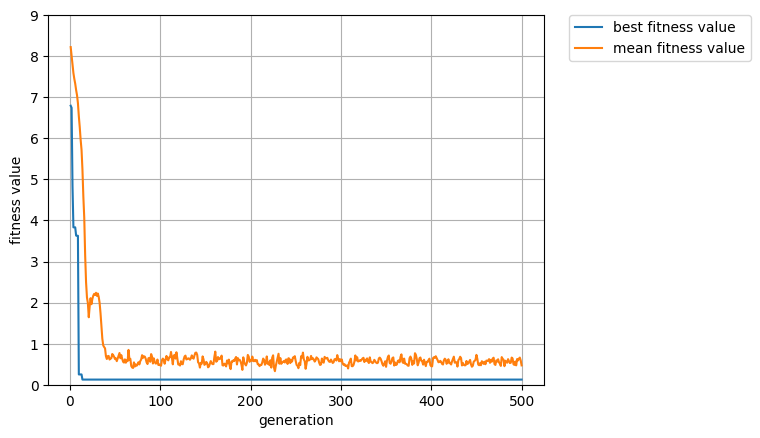

Experiment Id: bernstein_vazirani_3qubits_aee0ee2a-0d49-4c5e-93e3-f83652aed286
	Configuration: BaselineFitness; abstraction learning enabled
	2024-05-08 07:47:21.030957 - 2024-05-08 08:43:04.030095


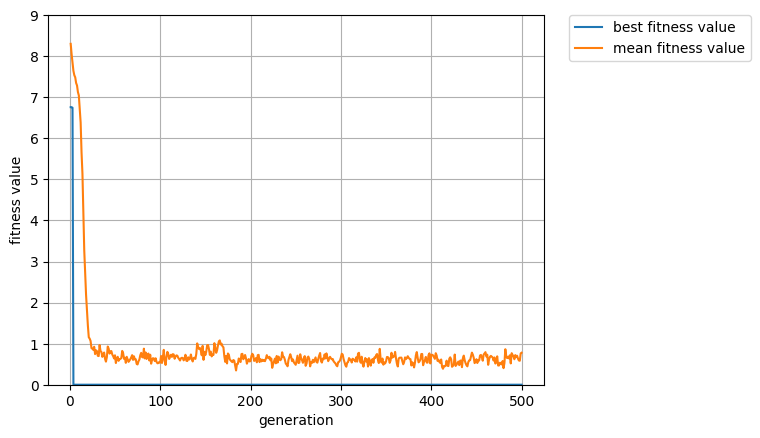

Experiment Id: bernstein_vazirani_3qubits_79f28390-1c2a-419c-8f55-8fe87cf9e022
	Configuration: IndirectQAFitness; abstraction learning enabled
	2024-05-08 08:43:24.063868 - 2024-05-08 09:29:55.387000


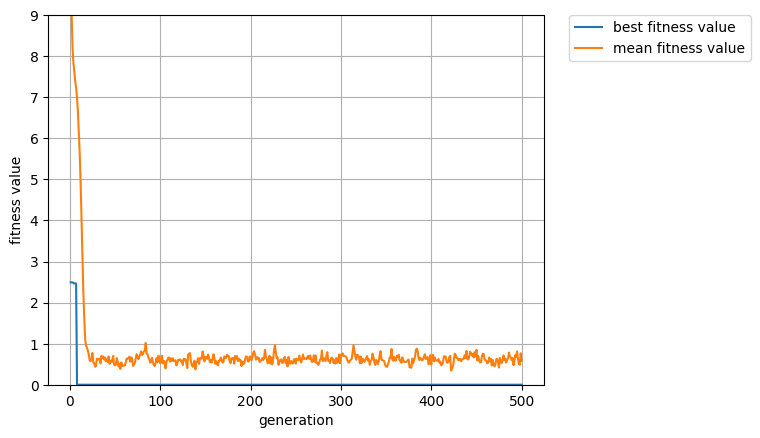

Experiment Id: bernstein_vazirani_3qubits_f6b18d43-5982-493a-9a96-b157e00472cd
	Configuration: DirectQAFitness; abstraction learning enabled
	2024-05-08 09:30:15.959957 - 2024-05-08 12:44:02.343451


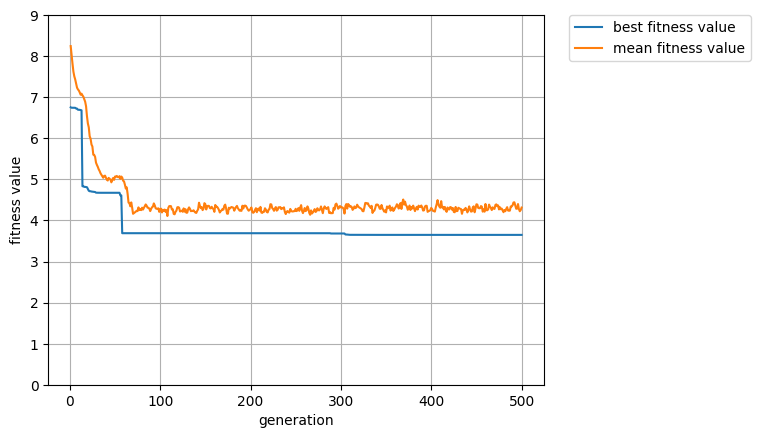

Experiment Id: bernstein_vazirani_3qubits_0e237a07-d8cc-4c87-a9f6-e294b8b8fa6e
	Configuration: BaselineFitness; no abstraction learning
	2024-05-10 15:12:11.534675 - 2024-05-10 16:45:36.184111


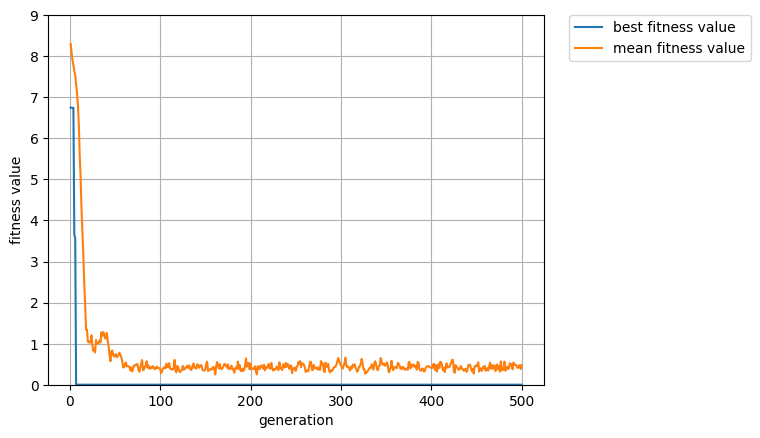

Experiment Id: bernstein_vazirani_3qubits_79211e5d-1df7-409f-a260-150ee01ac983
	Configuration: IndirectQAFitness; no abstraction learning
	2024-05-10 16:46:15.452524 - 2024-05-10 17:59:31.620554


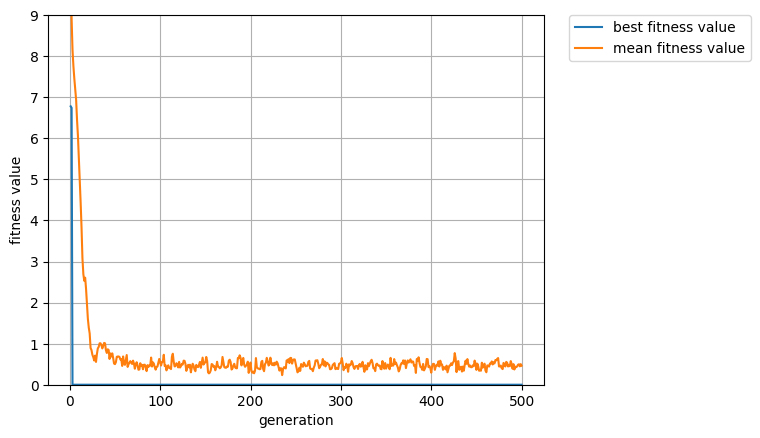

Experiment Id: bernstein_vazirani_3qubits_db48c5a0-b720-4f88-b76b-22711caa6831
	Configuration: DirectQAFitness; no abstraction learning
	2024-05-10 18:00:13.509948 - 2024-05-10 20:17:24.698286


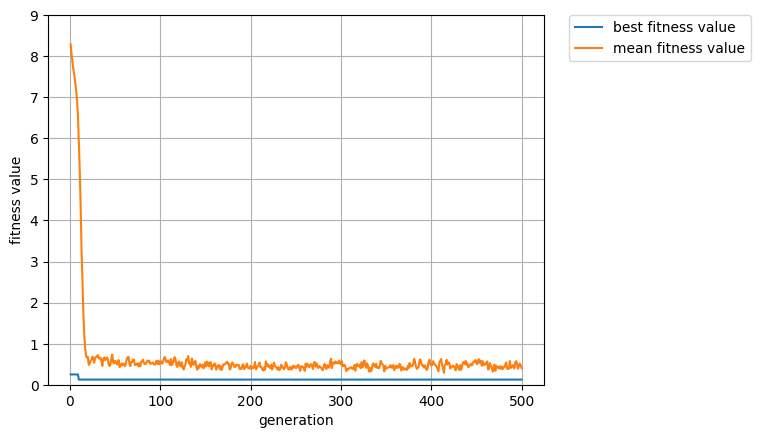

Experiment Id: bernstein_vazirani_3qubits_fef94c79-d0c2-4783-a30a-3e9dbb15f238
	Configuration: BaselineFitness; abstraction learning enabled
	2024-05-10 20:18:03.977973 - 2024-05-10 21:51:12.834557


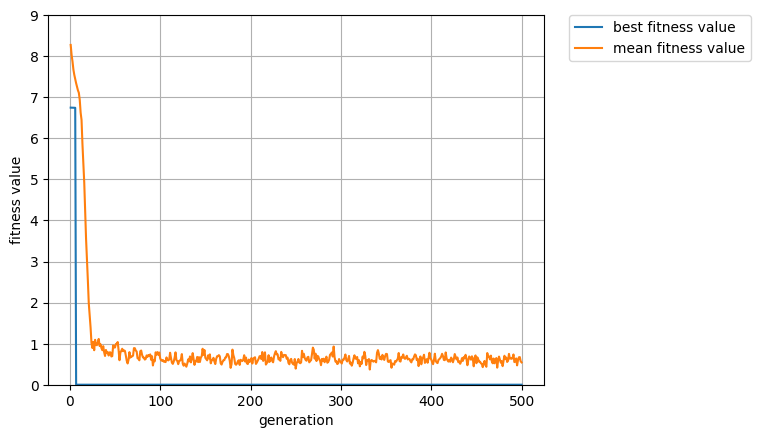

Experiment Id: bernstein_vazirani_3qubits_2db1aa60-743f-4119-a8ae-bd6ad234f9de
	Configuration: IndirectQAFitness; abstraction learning enabled
	2024-05-10 21:51:52.330127 - 2024-05-11 00:13:11.647548


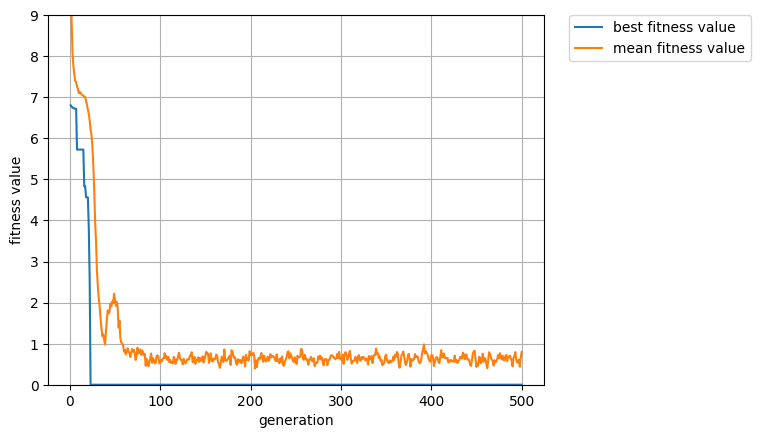

Experiment Id: bernstein_vazirani_3qubits_6974ef0c-5124-4407-b202-f4a3cb1e5b72
	Configuration: DirectQAFitness; abstraction learning enabled
	2024-05-11 00:13:51.619281 - 2024-05-11 03:23:23.586878


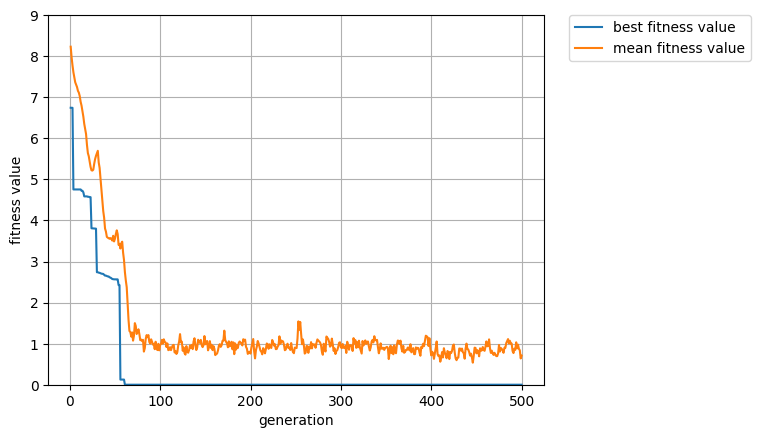

Experiment Id: bernstein_vazirani_3qubits_ab5f2e4e-7f86-42de-9ae1-5b8f975b4f9e
	Configuration: BaselineFitness; no abstraction learning
	2024-05-11 06:51:06.449371 - 2024-05-11 09:54:41.941637


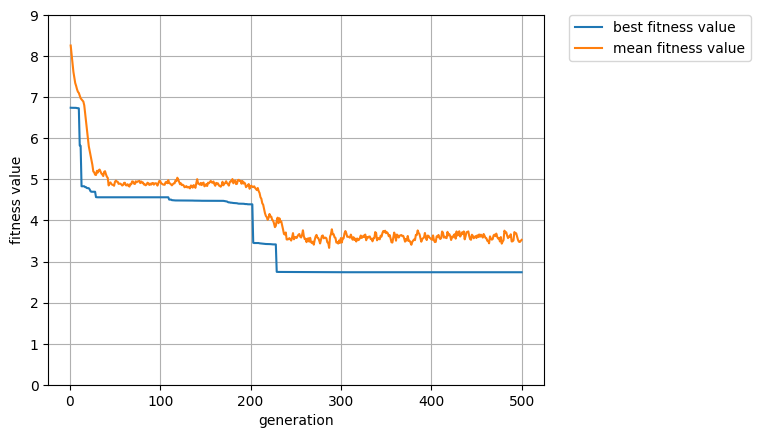

Experiment Id: bernstein_vazirani_3qubits_55698cdc-cfab-48e5-bd89-f7aeca59305b
	Configuration: IndirectQAFitness; no abstraction learning
	2024-05-11 09:55:02.092959 - 2024-05-11 11:21:34.437399


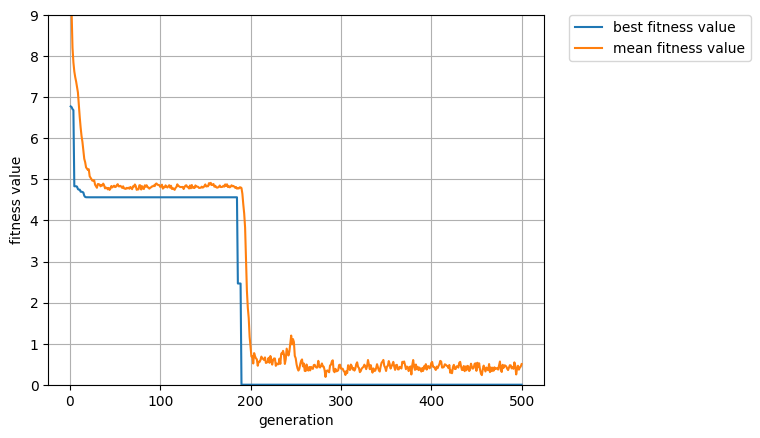

Experiment Id: bernstein_vazirani_3qubits_303440c4-062d-4063-a7b6-a876c3a16e0e
	Configuration: DirectQAFitness; no abstraction learning
	2024-05-11 11:21:54.918405 - 2024-05-11 12:27:42.211806


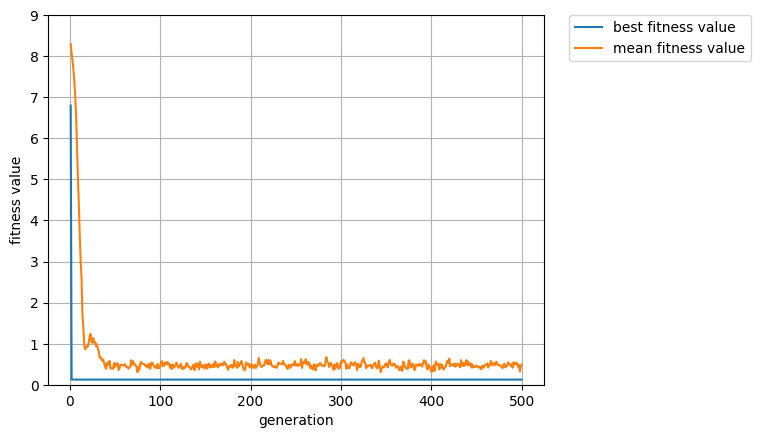

Experiment Id: bernstein_vazirani_3qubits_ffe6b734-2570-4cec-b03b-5d51f6726d40
	Configuration: BaselineFitness; abstraction learning enabled
	2024-05-11 12:28:02.655242 - 2024-05-11 14:25:41.915942


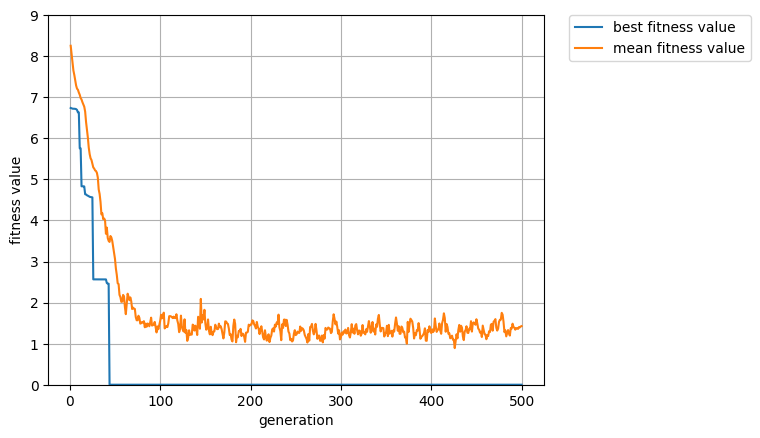

Experiment Id: bernstein_vazirani_3qubits_896274d6-97a3-429c-a1c1-8628cb8ed828
	Configuration: IndirectQAFitness; abstraction learning enabled
	2024-05-11 14:26:01.932614 - 2024-05-11 15:07:54.718961


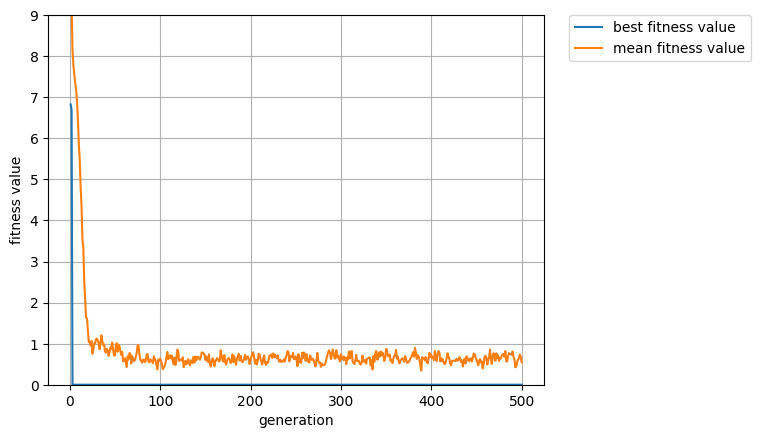

Experiment Id: bernstein_vazirani_3qubits_a2ebce86-d905-4eb7-ac1a-08b978936898
	Configuration: DirectQAFitness; abstraction learning enabled
	2024-05-11 15:08:15.443684 - 2024-05-11 16:09:09.046998


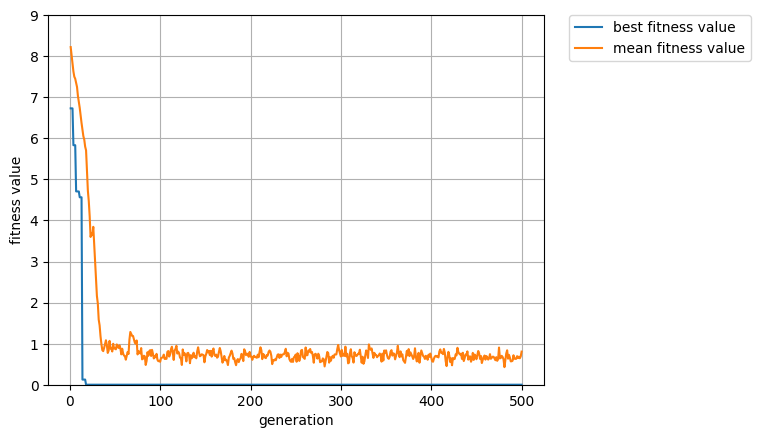

In [9]:
from matplotlib import pyplot as plt

experiment_ids = experiments["experiment_id"].unique()

for experiment_id in experiment_ids:
    configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
    
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
 
    ax = plt.subplot()
    ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])
    ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])
    ax.set_xlabel("generation")
    ax.set_ylabel("fitness value")
    ax.set_ylim([0, 9])
    
    print(f"Experiment Id: {experiment_id}")
    print(f"\tConfiguration: {configuration}")
    print(f"\t{current_fitness_values['created_at'].min()} - {current_fitness_values['created_at'].max()}")

    plt.grid()
    plt.legend(["best fitness value", "mean fitness value"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

## Visualize Fitness Value Changes Accross Experiments

Mean fitness values of bernstein: BaselineFitness; no abstraction learning


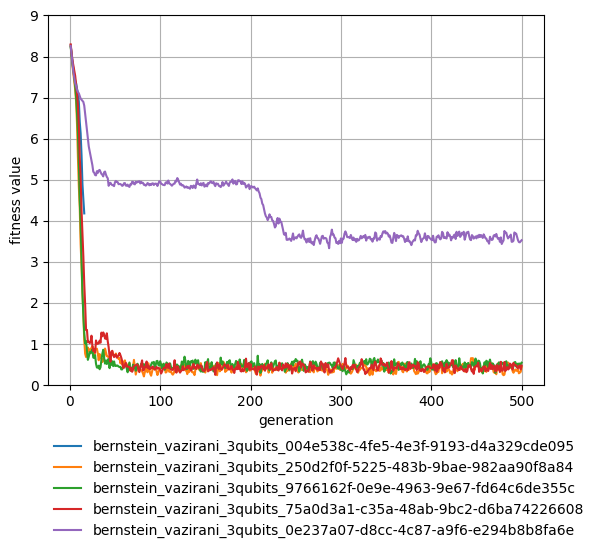

Mean fitness values of bernstein: IndirectQAFitness; no abstraction learning


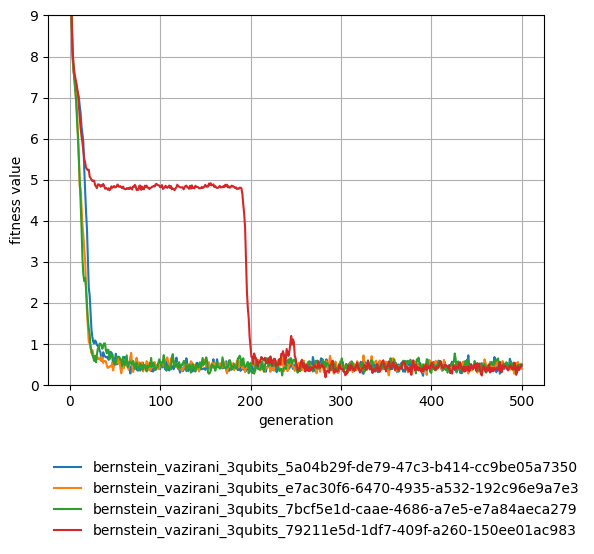

Mean fitness values of bernstein: DirectQAFitness; no abstraction learning


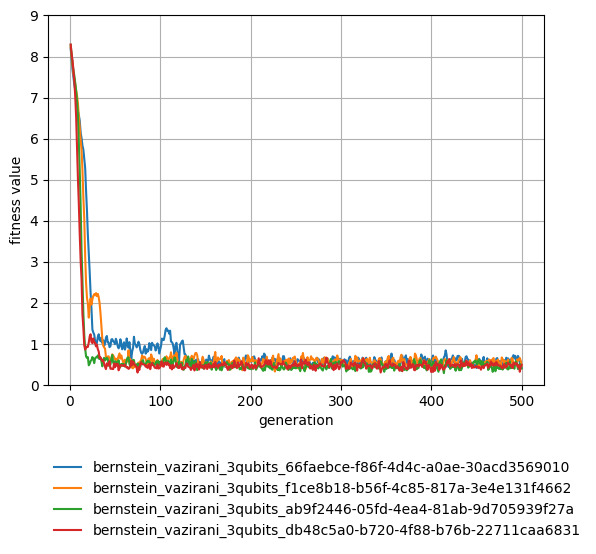

Mean fitness values of bernstein: BaselineFitness; abstraction learning enabled


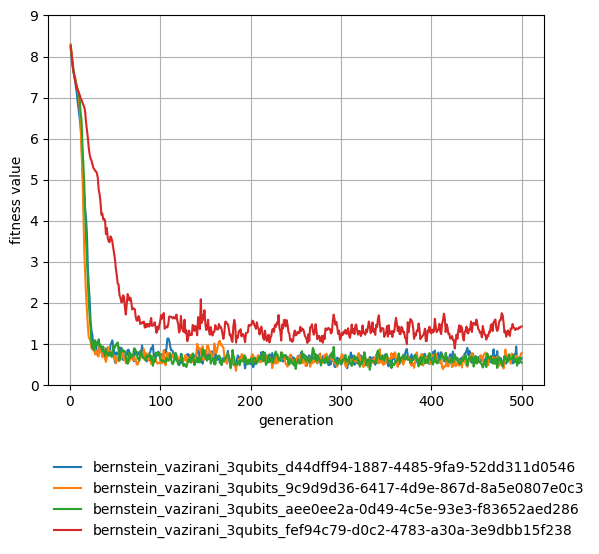

Mean fitness values of bernstein: IndirectQAFitness; abstraction learning enabled


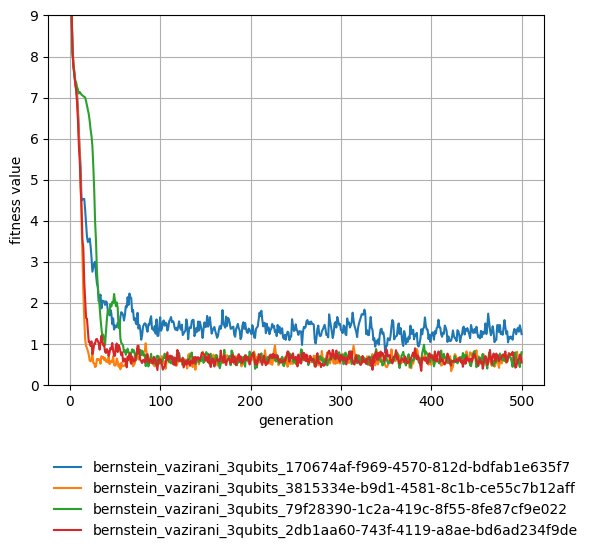

Mean fitness values of bernstein: DirectQAFitness; abstraction learning enabled


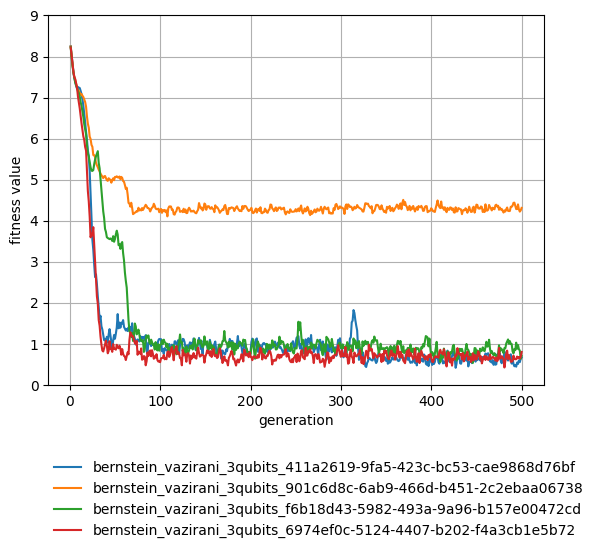

In [10]:
# Mean fitness values
configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    legend = []

    for experiment_id in experiment_ids:
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        if current_configuration != configuration:
            continue

        legend.append(experiment_id)
        
        current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
        
        ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])
        ax.set_xlabel("generation")
        ax.set_ylabel("fitness value")
        ax.set_ylim([0, 9])
        ax = plt.subplot()
    
    plt.legend(legend, bbox_to_anchor=(0, -0.43), loc='lower left', borderaxespad=0, framealpha=0)
    # plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, framealpha=0)
    plt.grid()
    print(f"Mean fitness values of {EVALUATION_CASE}: {configuration}")
    plt.savefig(f"results/{EVALUATION_CASE}_{configuration}_mean.png", bbox_inches='tight', transparent=True)
    plt.show()


Mean fitness values of bernstein: BaselineFitness; no abstraction learning


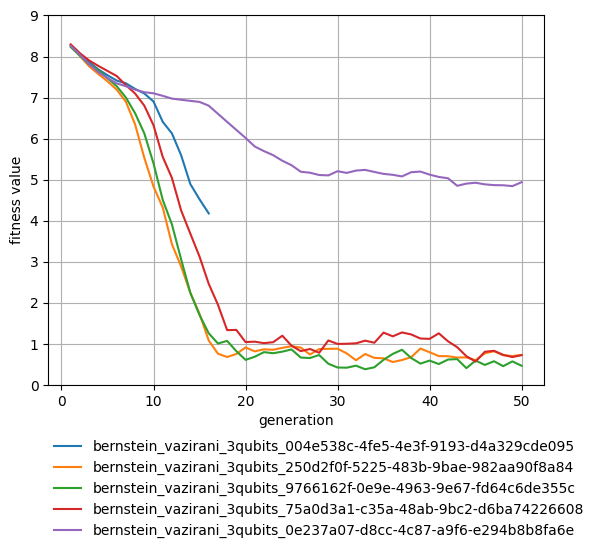

Mean fitness values of bernstein: IndirectQAFitness; no abstraction learning


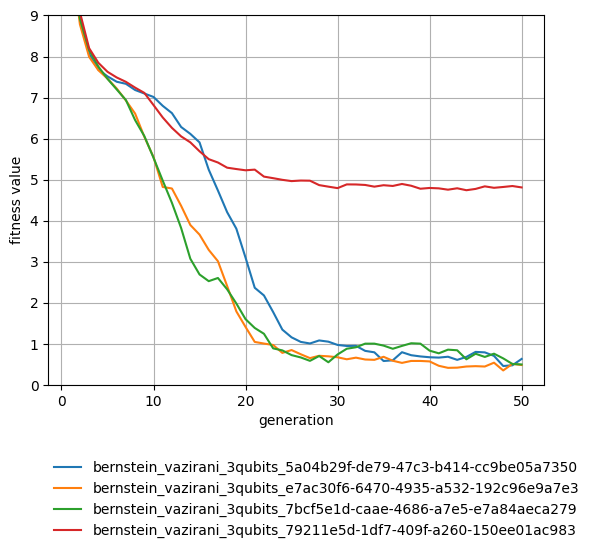

Mean fitness values of bernstein: DirectQAFitness; no abstraction learning


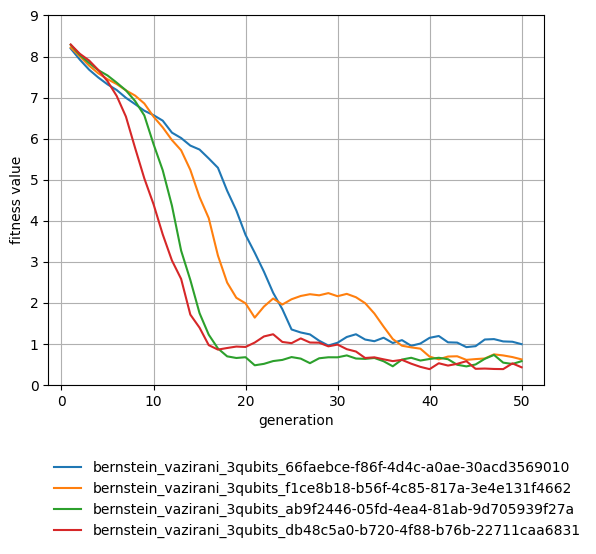

Mean fitness values of bernstein: BaselineFitness; abstraction learning enabled


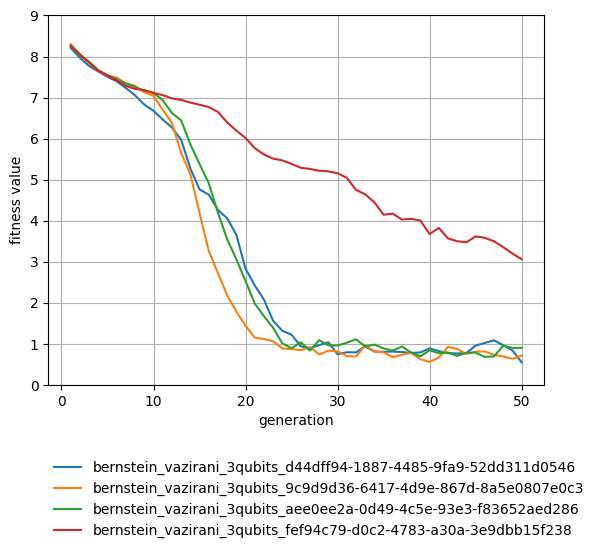

Mean fitness values of bernstein: IndirectQAFitness; abstraction learning enabled


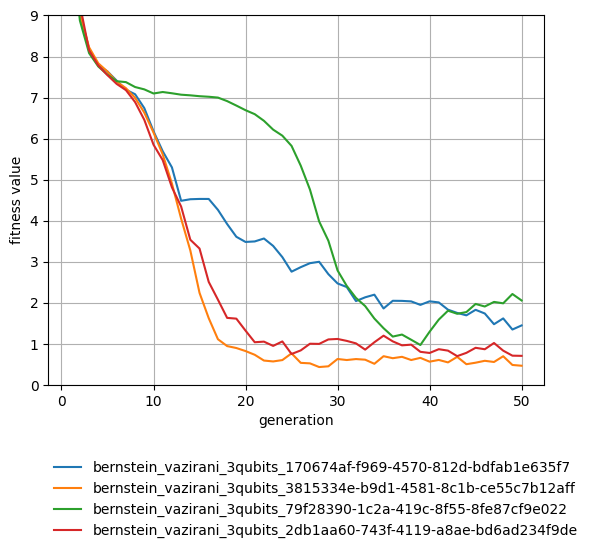

Mean fitness values of bernstein: DirectQAFitness; abstraction learning enabled


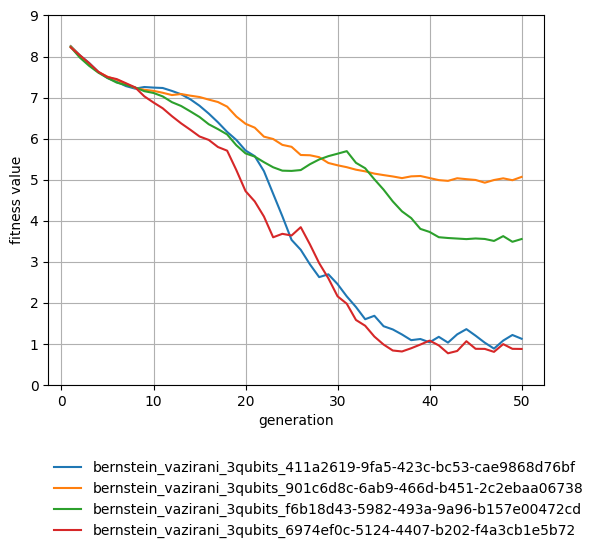

In [11]:
# Mean fitness values, first 50 generations
configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    legend = []

    for experiment_id in experiment_ids:
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        if current_configuration != configuration:
            continue

        legend.append(experiment_id)
        
        current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
        
        ax.plot(current_fitness_values["generation"].head(50), current_fitness_values["mean_fitness_value"].head(50))
        ax.set_xlabel("generation")
        ax.set_ylabel("fitness value")
        ax.set_ylim([0, 9])
        ax = plt.subplot()
    
    plt.legend(legend, bbox_to_anchor=(0, -0.43), loc='lower left', borderaxespad=0, framealpha=0)
    # plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, framealpha=0)
    plt.grid()
    print(f"Mean fitness values of {EVALUATION_CASE}: {configuration}")
    plt.savefig(f"results/{EVALUATION_CASE}_{configuration}_first50_mean.png", bbox_inches='tight', transparent=True)
    plt.show()


Best fitness values of bernstein: BaselineFitness; no abstraction learning


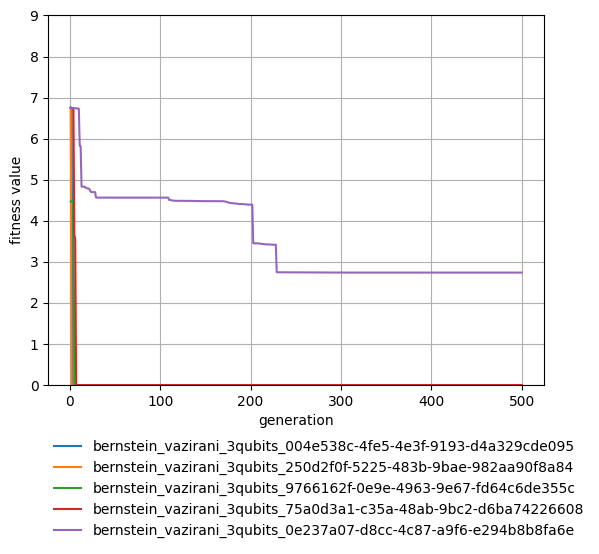

Best fitness values of bernstein: IndirectQAFitness; no abstraction learning


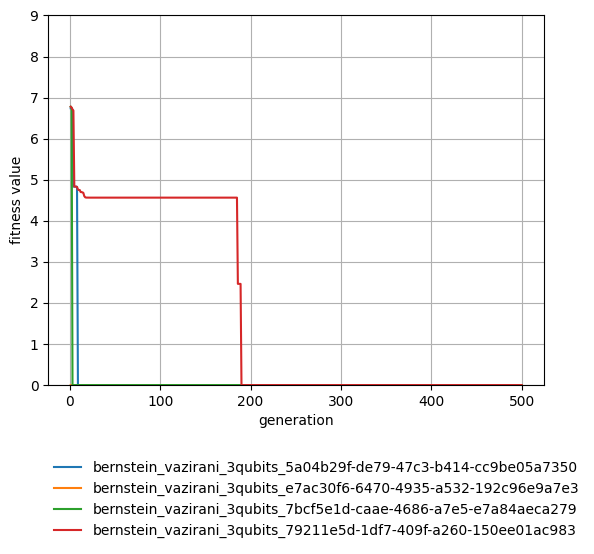

Best fitness values of bernstein: DirectQAFitness; no abstraction learning


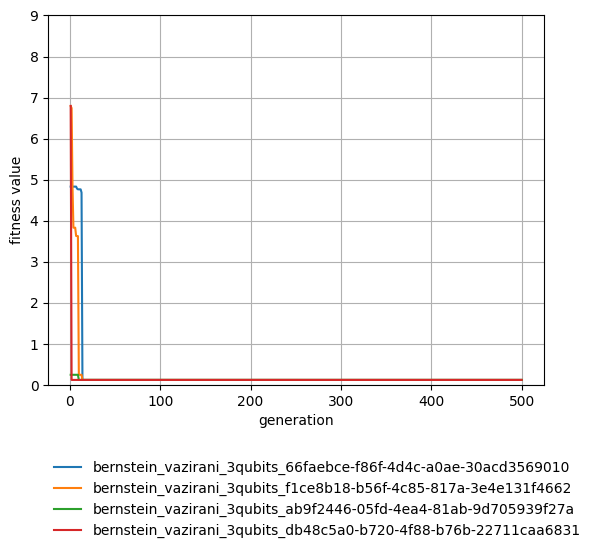

Best fitness values of bernstein: BaselineFitness; abstraction learning enabled


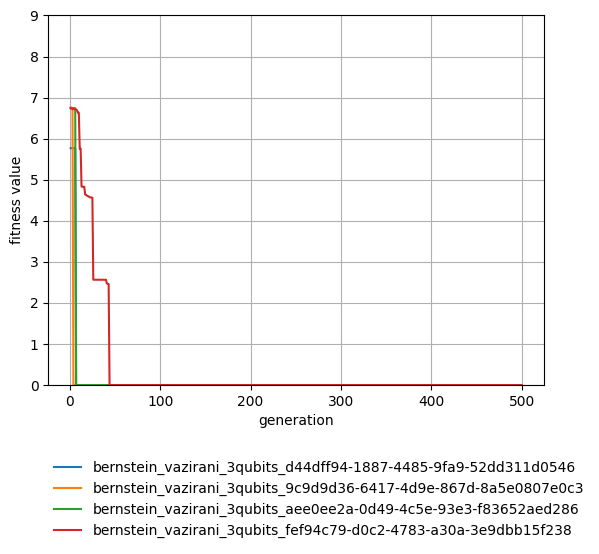

Best fitness values of bernstein: IndirectQAFitness; abstraction learning enabled


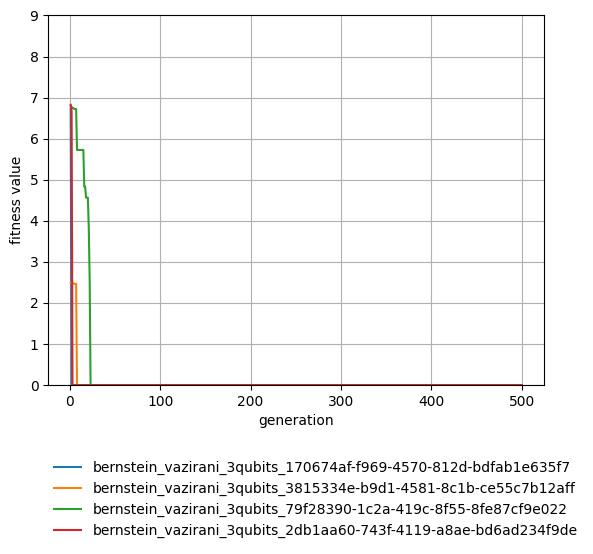

Best fitness values of bernstein: DirectQAFitness; abstraction learning enabled


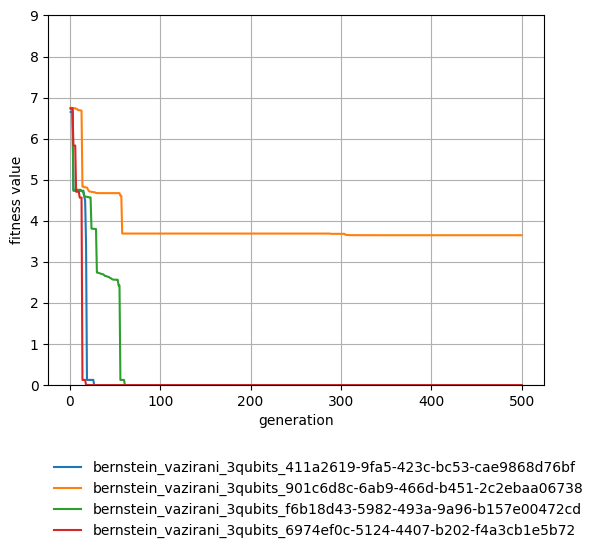

In [12]:
# Best fitness values
configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    legend = []

    for experiment_id in experiment_ids:        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        if current_configuration != configuration:
            continue

        legend.append(experiment_id)
        
        current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
        
        ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])
        ax.set_xlabel("generation")
        ax.set_ylabel("fitness value")
        ax.set_ylim([0, 9])
        ax = plt.subplot()
    
    # plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, framealpha=0)
    plt.legend(legend, bbox_to_anchor=(0, -0.43), loc='lower left', borderaxespad=0, framealpha=0)
    plt.grid()
    print(f"Best fitness values of {EVALUATION_CASE}: {configuration}")
    plt.savefig(f"results/{EVALUATION_CASE}_{configuration}_best.png", bbox_inches='tight', transparent=True)
    plt.show()


Best fitness values of bernstein: BaselineFitness; no abstraction learning


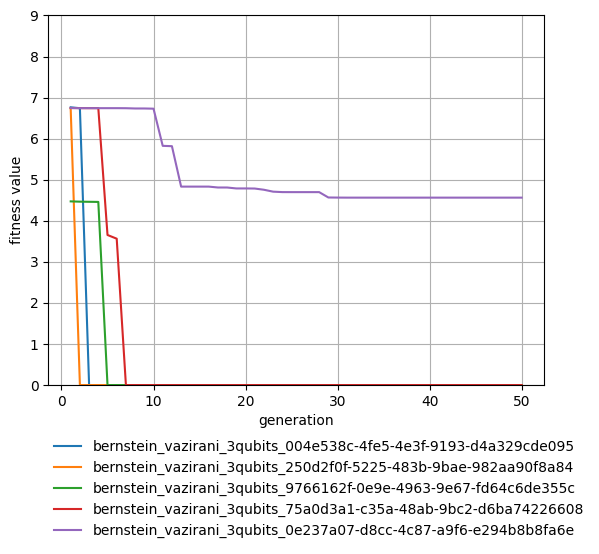

Best fitness values of bernstein: IndirectQAFitness; no abstraction learning


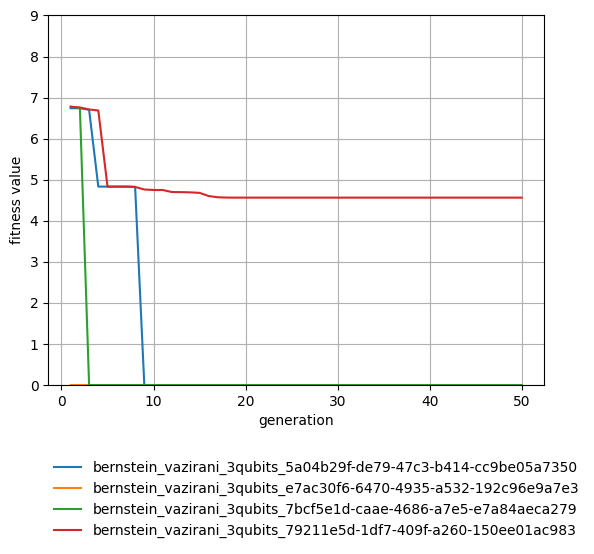

Best fitness values of bernstein: DirectQAFitness; no abstraction learning


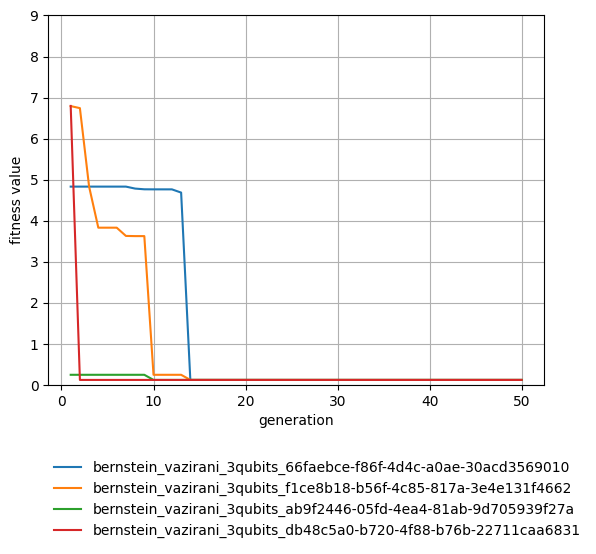

Best fitness values of bernstein: BaselineFitness; abstraction learning enabled


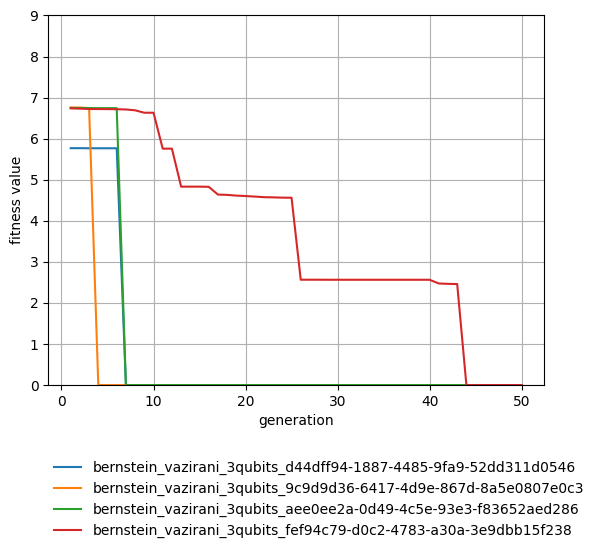

Best fitness values of bernstein: IndirectQAFitness; abstraction learning enabled


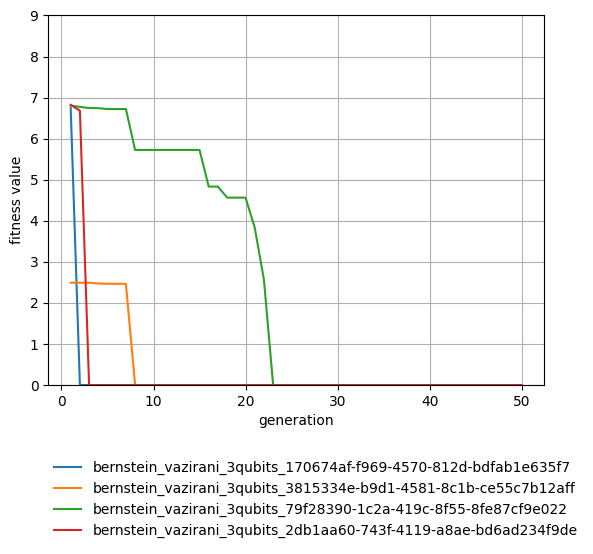

Best fitness values of bernstein: DirectQAFitness; abstraction learning enabled


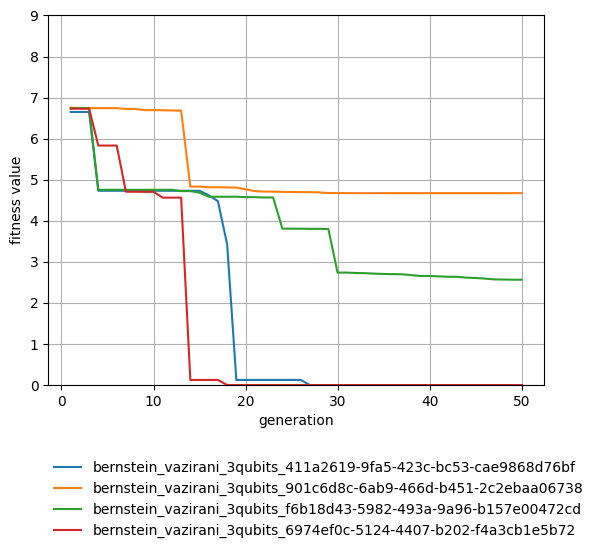

In [13]:
# Best fitness values, first 50 generations
configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    legend = []

    for experiment_id in experiment_ids:        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        if current_configuration != configuration:
            continue

        legend.append(experiment_id)
        
        current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
        
        ax.plot(current_fitness_values["generation"].head(50), current_fitness_values["best_fitness_value"].head(50))
        ax.set_xlabel("generation")
        ax.set_ylabel("fitness value")
        ax.set_ylim([0, 9])
        ax = plt.subplot()
    
    # plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, framealpha=0)
    plt.legend(legend, bbox_to_anchor=(0, -0.43), loc='lower left', borderaxespad=0, framealpha=0)
    plt.grid()
    print(f"Best fitness values of {EVALUATION_CASE}: {configuration}")
    plt.savefig(f"results/{EVALUATION_CASE}_{configuration}_first50_best.png", bbox_inches='tight', transparent=True)
    plt.show()


## Visualize Fitness Value Averages

Averaged mean fitness values of BaselineFitness; no abstraction learning


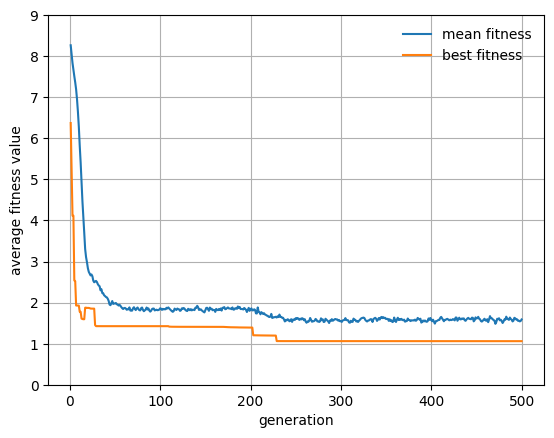

Averaged mean fitness values of IndirectQAFitness; no abstraction learning


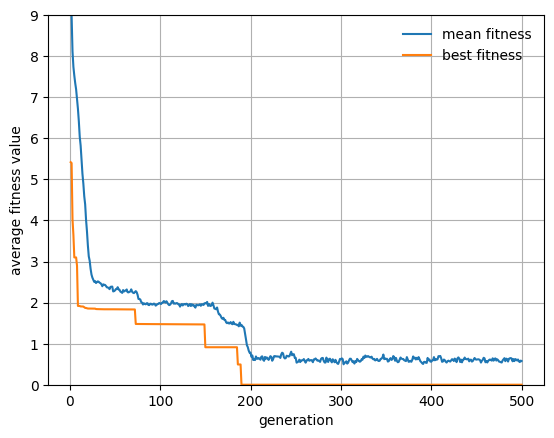

Averaged mean fitness values of DirectQAFitness; no abstraction learning


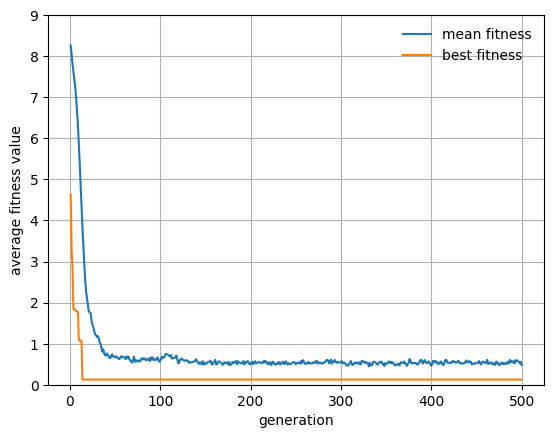

Averaged mean fitness values of BaselineFitness; abstraction learning enabled


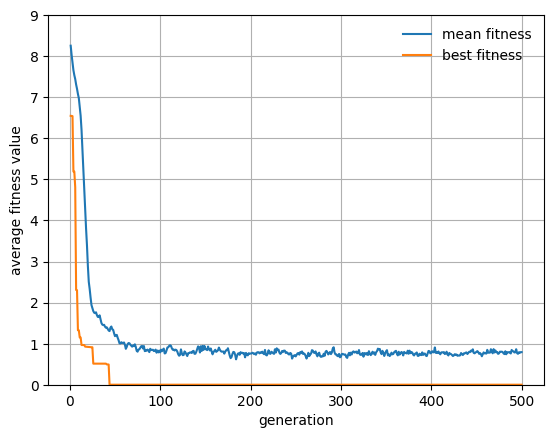

Averaged mean fitness values of IndirectQAFitness; abstraction learning enabled


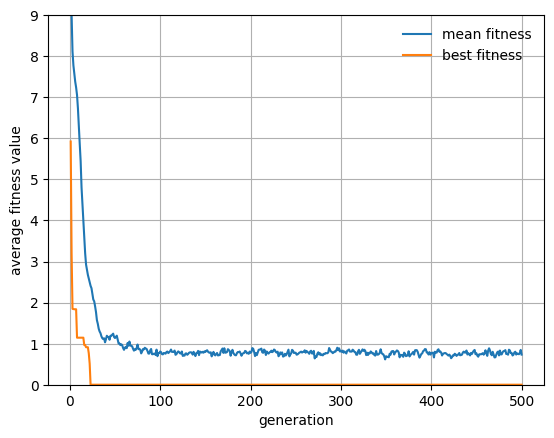

Averaged mean fitness values of DirectQAFitness; abstraction learning enabled


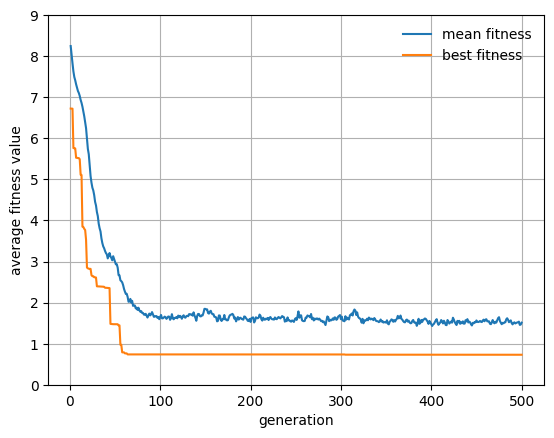

In [14]:
# Fitness value averages

configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    configuration_experiment_ids = []

    for experiment_id in experiment_ids:        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        
        if current_configuration == configuration:
            configuration_experiment_ids.append(experiment_id)
    
    configuration_fitness_values = fitness_values.loc[fitness_values["experiment_id"].isin(configuration_experiment_ids)]

    generations = configuration_fitness_values["generation"].unique()
    average_mean_fitness_values = configuration_fitness_values.groupby(["generation"])["mean_fitness_value"].mean()
    average_best_fitness_values = configuration_fitness_values.groupby(["generation"])["best_fitness_value"].mean()
    
    ax = plt.subplot()
    ax.plot(generations, average_mean_fitness_values)
    ax.plot(generations, average_best_fitness_values)
    ax.set_xlabel("generation")
    ax.set_ylabel("average fitness value")
    ax.set_ylim([0, 9])
    ax = plt.subplot()

    plt.grid()
    plt.legend(["mean fitness", "best fitness"], framealpha=0)
    print(f"Averaged mean fitness values of {configuration}")
    plt.savefig(f"results/{EVALUATION_CASE}_{configuration}_averaged.png", bbox_inches='tight', transparent=True)
    plt.show()
        


Averaged mean fitness values of BaselineFitness; no abstraction learning


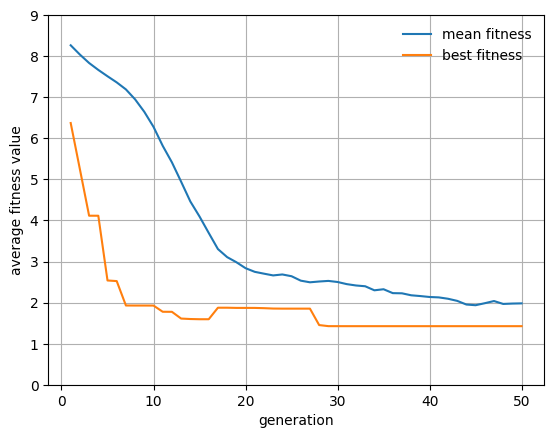

Averaged mean fitness values of IndirectQAFitness; no abstraction learning


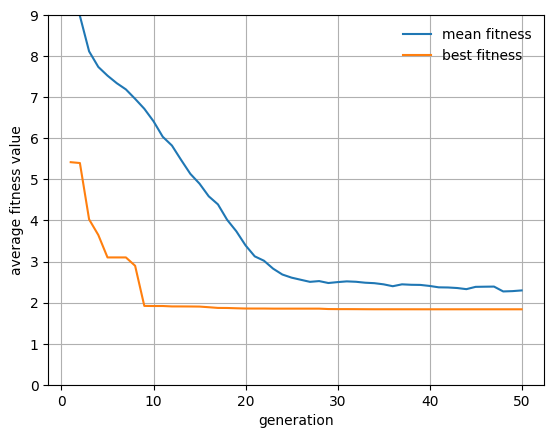

Averaged mean fitness values of DirectQAFitness; no abstraction learning


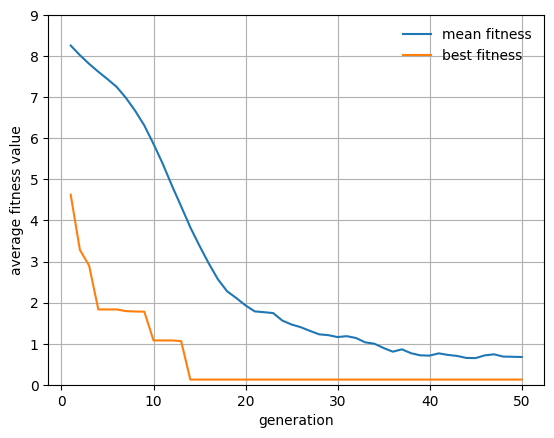

Averaged mean fitness values of BaselineFitness; abstraction learning enabled


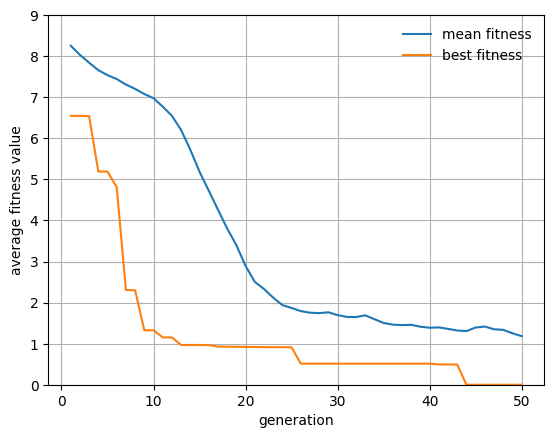

Averaged mean fitness values of IndirectQAFitness; abstraction learning enabled


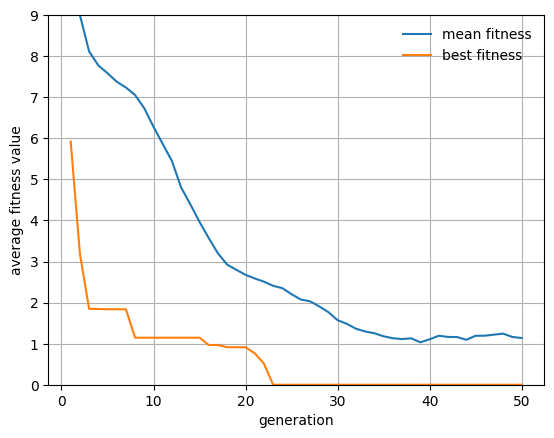

Averaged mean fitness values of DirectQAFitness; abstraction learning enabled


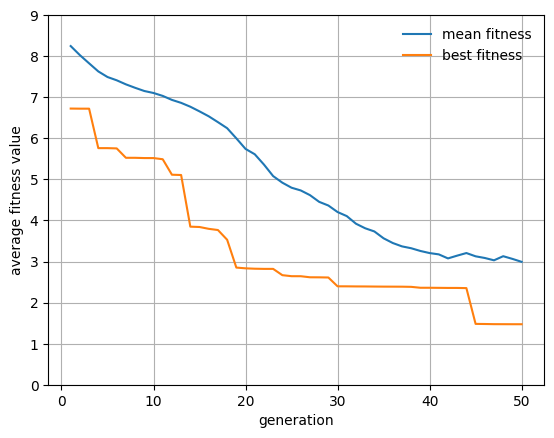

In [15]:
# Fitness value averages, first 50 generations

configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    configuration_experiment_ids = []

    for experiment_id in experiment_ids:        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        
        if current_configuration == configuration:
            configuration_experiment_ids.append(experiment_id)
    
    configuration_fitness_values = fitness_values.loc[fitness_values["experiment_id"].isin(configuration_experiment_ids)]

    generations = configuration_fitness_values["generation"].unique()
    average_mean_fitness_values = configuration_fitness_values.groupby(["generation"])["mean_fitness_value"].mean()
    average_best_fitness_values = configuration_fitness_values.groupby(["generation"])["best_fitness_value"].mean()
    
    ax = plt.subplot()
    ax.plot(generations[:50], average_mean_fitness_values.head(50))
    ax.plot(generations[:50], average_best_fitness_values.head(50))
    ax.set_xlabel("generation")
    ax.set_ylabel("average fitness value")
    ax.set_ylim([0, 9])
    ax = plt.subplot()

    plt.grid()
    plt.legend(["mean fitness", "best fitness"], framealpha=0)
    print(f"Averaged mean fitness values of {configuration}")
    plt.savefig(f"results/{EVALUATION_CASE}_{configuration}_first50_averaged.png", bbox_inches='tight', transparent=True)
    plt.show()
        


## Print the best gate sequence of each experiment

In [16]:
for i, experiment in experiments.iterrows():
    print(f"\nExperiment Id: {experiment['experiment_id']}")
    print(f"\tDescription: {experiment['description']}")
    print(f"\tFitness Function: {experiment['fitness']}")
    print(f"\tLast commit id: {experiment['last_commit_id']}")

    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment["experiment_id"]]
    last_fitness_row = current_fitness_values[current_fitness_values["generation"] == current_fitness_values["generation"].max()]
    
    print(f"\tBest fitness value: {last_fitness_row['best_fitness_value'].tolist()[0]}")
    print(f"\tBest chromosome: {last_fitness_row['best_chromosome'].tolist()[0]}")



Experiment Id: bernstein_vazirani_3qubits_004e538c-4fe5-4e3f-9193-d4a329cde095
	Description:  
	Fitness Function: BaselineFitness
	Last commit id:  ad557ed0c413efda62c1c7299bf6cd2538f4199c
	Best fitness value: 2.5641455039627994
	Best chromosome:  [cz(control=1,target=3), swap(target1=2,target2=1), swap(target1=2,target2=1), y(target=1), oracle(target1=3,target2=0,target3=2,target4=1), rx(theta=-1.2309500356647223,target=0), swap_layer(), oracle(target1=0,target2=2,target3=3,target4=1), swap(target1=0,target2=2), swap(target1=3,target2=1), oracle(target1=0,target2=2,target3=1,target4=3), z(target=1), swap_layer(), crz(theta=-1.3320834815557017,control=1,target=3), cz(control=1,target=0)]

Experiment Id: bernstein_vazirani_3qubits_5a04b29f-de79-47c3-b414-cc9be05a7350
	Description:  
	Fitness Function: IndirectQAFitness
	Last commit id:  ad557ed0c413efda62c1c7299bf6cd2538f4199c
	Best fitness value: 0.00015
	Best chromosome:  [x(target=0), y(target=3), rx(theta=0.6334858185027342,target=